In [198]:
# -*- coding: utf-8 -*-
import pandas as pd
import json

# static/zoomable/flare.json

In [199]:
panel3_task_year_df = pd.read_csv("../static/data/csv/Panel 3.csv")
panel3_job_skill_2008_df = pd.read_csv("../static/data/csv/Panel 3 Skill Importance 2008.csv")
panel3_job_skill_2018_df = pd.read_csv("../static/data/csv/Panel 3 Skill Importance 2018.csv")

In [200]:
panel3_task_year_df.head()

,Skill Id,Skill Name,Description,Task,2008 Automation Level,2018 Automation Level,Change between 2008-2018
0,1.A.1.a.1,Oral Comprehension,The ability to listen to and understand inform...,Clerical Task,50.168444,49.588959,-0.579484
1,1.A.1.a.2,Written Comprehension,The ability to read and understand information...,Clerical Task,54.392630,52.165415,-2.227215
2,1.A.1.a.3,Oral Expression,The ability to communicate information and ide...,Clerical Task,47.009005,46.407230,-0.601775
3,1.A.1.a.4,Written Expression,The ability to communicate information and ide...,Clerical Task,51.888488,49.189672,-2.698817
4,1.A.1.b.1,Fluency of Ideas,The ability to come up with a number of ideas ...,System Analysis,42.603277,40.549949,-2.053328


In [201]:
panel3_job_skill_2018_df.head()

,Job Code,Job Title,Job Family,Oral Comprehension,Written Comprehension,Oral Expression,Written Expression,Fluency of Ideas,Originality,Problem Sensitivity,...,Consequence of Error,Impact of Decisions on Co-workers or Company Results,Frequency of Decision Making,Freedom to Make Decisions,Importance of Being Exact or Accurate,Importance of Repeating Same Tasks,Structured versus Unstructured Work,Level of Competition,Time Pressure,Pace Determined by Speed of Equipment
0,00-0000,TOTAL AVERAGE,TOTAL AVERAGE,-4.426570e-15,9.284690e-15,5.951510e-15,4.753190e-15,3.475710e-15,-7.596070e-16,7.438850e-15,...,-4.293160e-15,3.000110e-15,-1.009940e-15,-7.834240e-15,-2.530060e-15,-2.336840e-15,2.963580e-15,9.845170e-16,-1.002190e-14,1.292510e-15
1,11-1011,Chief Executives,Management Occupations,1.851282e+00,1.330436e+00,1.406368e+00,1.384890e+00,1.981513e+00,2.035220e+00,1.070821e+00,...,6.657280e-01,2.261792e+00,1.961981e+00,1.683699e+00,-7.421788e-02,-4.702803e-02,-2.039406e+00,1.940645e+00,6.754331e-01,-2.976255e-01
2,11-1021,General and Operations Managers,Management Occupations,6.690507e-01,8.929188e-01,6.290354e-01,1.191306e+00,3.129906e-01,4.230300e-01,1.070821e+00,...,4.195293e-01,1.524550e+00,1.277041e+00,1.412007e+00,-4.905627e-01,5.216704e-01,-1.659254e+00,6.338627e-01,7.159869e-01,-3.612924e-01
3,11-2011,Advertising and Promotions Managers,Management Occupations,6.690507e-01,8.929188e-01,1.140438e+00,9.977221e-01,1.735027e+00,1.797056e+00,1.230482e-01,...,-1.159039e+00,4.403695e-01,8.512672e-01,-1.345434e-01,2.686543e-01,-8.842785e-01,-4.554383e-01,4.572705e-01,1.080971e+00,-9.979622e-01
4,11-2021,Marketing Managers,Management Occupations,6.690507e-01,8.929188e-01,6.290354e-01,9.977221e-01,1.735027e+00,1.558891e+00,1.230482e-01,...,-3.335490e-01,7.005728e-01,4.625176e-01,6.596313e-01,-9.313985e-01,-7.579011e-01,-1.300221e+00,1.534483e+00,6.957100e-01,-9.767399e-01


In [202]:
def standardizer(df, col):
    df[col] -= df[col].min()
    df[col] /= df[col].max()
    
    df[col] = (30**df[col]-1)/30
    
    df[col] = [0.5 if value > 0.5 else value for value in df[col]]
    
    #df[col] = df[col]*200
    #df[col] = df[col]+10
    return df

In [203]:
def standardizer_diff(df, col):
    df[col] -= df[col].min()
    df[col] /= df[col].max()
    
    df[col] = (30**df[col]-1)/30
    
    df[col] = [0.6 if value > 0.6 else value for value in df[col]]
    
    #df[col] = df[col]*200
    #df[col] = df[col]+10
    return df

In [204]:
panel3_task_year_df = standardizer(panel3_task_year_df, "2008 Automation Level")
panel3_task_year_df = standardizer(panel3_task_year_df, "2018 Automation Level")
panel3_task_year_df = standardizer_diff(panel3_task_year_df, "Change between 2008-2018")

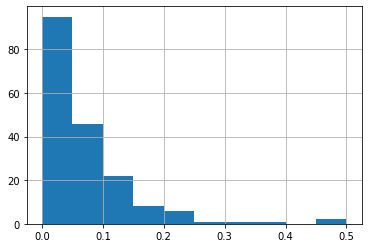

In [205]:
%matplotlib inline
panel3_task_year_df["2008 Automation Level"].hist()

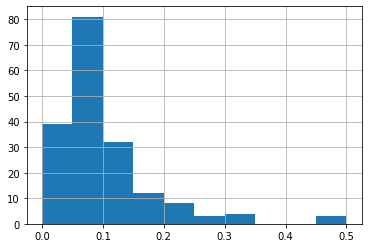

In [206]:
panel3_task_year_df["2018 Automation Level"].hist()

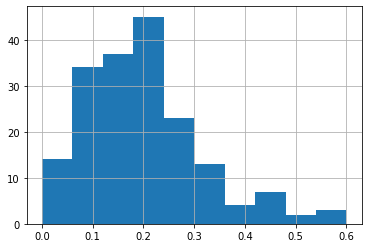

In [207]:
panel3_task_year_df["Change between 2008-2018"].hist()

In [208]:
cols = panel3_job_skill_2018_df.columns[3:]

for col in cols:
    panel3_job_skill_2018_df = standardizer(panel3_job_skill_2018_df, col)

In [209]:
cols = panel3_job_skill_2008_df.columns[3:]

for col in cols:
    panel3_job_skill_2008_df = standardizer(panel3_job_skill_2008_df, col)

In [210]:
panel3_task_year_df_gp = panel3_task_year_df.groupby('Task')

#grey 220,220,220
#crimson 220,20,60

In [211]:
color1 = [255,255,255]
color2 = [220,20,60]

In [212]:
for i in range(panel3_job_skill_2018_df.shape[0]):
    #print(panel3_job_skill_2018_df.iloc[i]['Job Code'], panel3_job_skill_2008_df.iloc[i]['Job Code'])
    
    skillmap = {}
    skillmap["name"] = panel3_job_skill_2018_df.iloc[i]['Job Title']
    skillmap["code"] = panel3_job_skill_2018_df.iloc[i]['Job Code']  
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for j, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"],
                                     "importance_2018": panel3_job_skill_2018_df.iloc[i][r2["Skill Name"]],
                                      "importance_2008":panel3_job_skill_2008_df.iloc[i][r2["Skill Name"]], 
                                      "importance_2008_2018": panel3_job_skill_2018_df.iloc[i][r2["Skill Name"]],
                                      
                                      "r_2018":(color2[0]*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+
                                                    color1[0]*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/
                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automation Level"].min()),
                                      "g_2018":(color2[1]*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+
                                                    color1[1]*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/
                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automation Level"].min()),
                                      "b_2018":(color2[2]*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+
                                                    color1[2]*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/
                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automation Level"].min()),                                      
                                      "r_2008":(color2[0]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[0]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "g_2008":(color2[1]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[1]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(color2[2]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[2]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "r_2008_2018":(color2[0]*(r2["Change between 2008-2018"]-panel3_task_year_df["Change between 2008-2018"].min())+
                                                    color1[0]*(panel3_task_year_df["Change between 2008-2018"].max()-r2["Change between 2008-2018"]))/
                                                (panel3_task_year_df["Change between 2008-2018"].max()-panel3_task_year_df["Change between 2008-2018"].min()),
                                      "g_2008_2018":(color2[1]*(r2["Change between 2008-2018"]-panel3_task_year_df["Change between 2008-2018"].min())+
                                                    color1[1]*(panel3_task_year_df["Change between 2008-2018"].max()-r2["Change between 2008-2018"]))/
                                                (panel3_task_year_df["Change between 2008-2018"].max()-panel3_task_year_df["Change between 2008-2018"].min()),
                                      "b_2008_2018":(color2[2]*(r2["Change between 2008-2018"]-panel3_task_year_df["Change between 2008-2018"].min())+
                                                    color1[2]*(panel3_task_year_df["Change between 2008-2018"].max()-r2["Change between 2008-2018"]))/
                                                (panel3_task_year_df["Change between 2008-2018"].max()-panel3_task_year_df["Change between 2008-2018"].min()),
                                     })
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2018'+'.json', 'w') as outfile:
    with open('../static/data/network/'+panel3_job_skill_2018_df.iloc[i]['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)

In [130]:
"""
for i, r1 in zip(panel3_job_skill_2018_df.iterrows(), panel3_job_skill_2008_df.iterrows):
    skillmap = {}
    skillmap["name"] = r1['Job Title']
    skillmap["code"] = r1['Job Code']
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for i, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"],
                                     "importance": r1[r2["Skill Name"]],
                                      "r_2018":220,
                                      "g_2018":(20*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/
                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automation Level"].min()),
                                      "b_2018":(60*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/
                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automation Level"].min()),                                      
                                      "r_2008":220,
                                      "g_2008":(20*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(60*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "r_2008_2018":220,
                                      "g_2008_2018":(20*(r2["Change between 2008-2018"]-panel3_task_year_df["Change between 2008-2018"].min())+
                                                    220*(panel3_task_year_df["Change between 2008-2018"].max()-r2["Change between 2008-2018"]))/
                                                (panel3_task_year_df["Change between 2008-2018"].max()-panel3_task_year_df["Change between 2008-2018"].min()),
                                      "b_2008_2018":(60*(r2["Change between 2008-2018"]-panel3_task_year_df["Change between 2008-2018"].min())+
                                                    220*(panel3_task_year_df["Change between 2008-2018"].max()-r2["Change between 2008-2018"]))/
                                                (panel3_task_year_df["Change between 2008-2018"].max()-panel3_task_year_df["Change between 2008-2018"].min()),
                                     "skill_id": r2["Skill Id"], "task": r2["Task"], "desc":r2["Description"]})
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2018'+'.json', 'w') as outfile:
    with open('../static/data/network/'+r1['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)
"""        

'\nfor i, r1 in zip(panel3_job_skill_2018_df.iterrows(), panel3_job_skill_2008_df.iterrows):\n    skillmap = {}\n    skillmap["name"] = r1[\'Job Title\']\n    skillmap["code"] = r1[\'Job Code\']\n    child_collection = []\n    \n    for nm, gp in panel3_task_year_df_gp:\n        child = {}\n        child["name"] = nm\n        child["children"] = []\n        \n        for i, r2 in gp.iterrows():\n            child["children"].append({"name": r2["Skill Name"],\n                                     "importance": r1[r2["Skill Name"]],\n                                      "r_2018":220,\n                                      "g_2018":(20*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+\n                                                    220*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/\n                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automatio

In [13]:
"""
for i, r1 in panel3_job_skill_df.iterrows():
    skillmap = {}
    skillmap["name"] = r1['Job Title']
    skillmap["code"] = r1['Job Code']
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for i, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"], "importance": r1[r2["Skill Name"]],
                                     "automation_2018": r2["2018 Automation Level"],
                                      "r_2018":220,
                                      "g_2018":(20*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/
                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automation Level"].min()),
                                                
                                      "b_2018":(60*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/
                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automation Level"].min()),                                      
                                     "automation_2008": r2["Change between 2008-2018"],   
                                      "r_2008":220,
                                      "g_2008":(20*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(60*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                     "automation_2008~2018": r2["Change between 2008-2018"],   
                                      "r_2008_2018":220,
                                      "g_2008_2018":(20*(r2["Change between 2008-2018"]-panel3_task_year_df["Change between 2008-2018"].min())+
                                                    220*(panel3_task_year_df["Change between 2008-2018"].max()-r2["Change between 2008-2018"]))/
                                                (panel3_task_year_df["Change between 2008-2018"].max()-panel3_task_year_df["Change between 2008-2018"].min()),
                                      "b_2008_2018":(60*(r2["Change between 2008-2018"]-panel3_task_year_df["Change between 2008-2018"].min())+
                                                    220*(panel3_task_year_df["Change between 2008-2018"].max()-r2["Change between 2008-2018"]))/
                                                (panel3_task_year_df["Change between 2008-2018"].max()-panel3_task_year_df["Change between 2008-2018"].min()),
                                     "skill_id": r2["Skill Id"], "task": r2["Task"], "desc":r2["Description"]})
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2018'+'.json', 'w') as outfile:
    with open('../static/data/network/'+r1['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)
"""

'\nfor i, r1 in panel3_job_skill_df.iterrows():\n    skillmap = {}\n    skillmap["name"] = r1[\'Job Title\']\n    skillmap["code"] = r1[\'Job Code\']\n    child_collection = []\n    \n    for nm, gp in panel3_task_year_df_gp:\n        child = {}\n        child["name"] = nm\n        child["children"] = []\n        \n        for i, r2 in gp.iterrows():\n            child["children"].append({"name": r2["Skill Name"], "importance": r1[r2["Skill Name"]],\n                                     "automation_2018": r2["2018 Automation Level"],\n                                      "r_2018":220,\n                                      "g_2018":(20*(r2["2018 Automation Level"]-panel3_task_year_df["2018 Automation Level"].min())+\n                                                    220*(panel3_task_year_df["2018 Automation Level"].max()-r2["2018 Automation Level"]))/\n                                                (panel3_task_year_df["2018 Automation Level"].max()-panel3_task_year_df["2018 Automa